In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data = pd.read_excel(r'data train .xlsx')

In [8]:
train_data.head(6)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873


In [9]:
train_data.tail(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [13]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [14]:
train_data.dropna(inplace=True)

In [15]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [18]:
data = train_data.copy()

In [19]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [21]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])


In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\3970302086.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col]=pd.to_datetime(data[col])
C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\3970302086.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])
C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\3970302086.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])


In [24]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [25]:
data['Date_of_Journey'].dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int32

In [26]:
data['Date_of_Journey'].dt.month

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Date_of_Journey, Length: 10682, dtype: int32

In [27]:
data['Date_of_Journey'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10682, dtype: int32

In [28]:
data["Journey_day"]= data['Date_of_Journey'].dt.day

In [29]:
data["Journey_month"]= data['Date_of_Journey'].dt.month

In [30]:
data["Journey_year"]= data['Date_of_Journey'].dt.year

In [31]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-27 05:50:00,2023-12-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-27 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [32]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    return df.head(3)

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [34]:

extract_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-27 05:50:00,2023-12-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-27 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [35]:

extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-27 05:50:00,2023-12-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-27 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [36]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop , axis=1, inplace=True)

In [37]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [38]:
data.shape

(10682, 16)

In [39]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [40]:
### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early morning'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'AfterNoon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

In [41]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early morning
2              Morning
3              Evening
4            AfterNoon
             ...      
10678          Evening
10679          Evening
10680    Early morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [42]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early morning    2880
Evening          2357
Morning          2209
AfterNoon        1731
Night            1040
Late night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

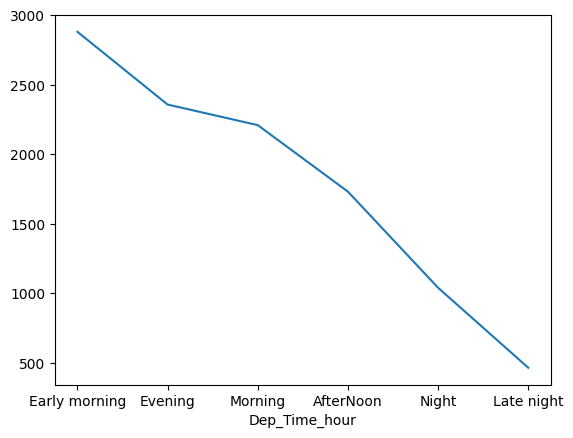

In [43]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot()

<Axes: xlabel='Dep_Time_hour'>

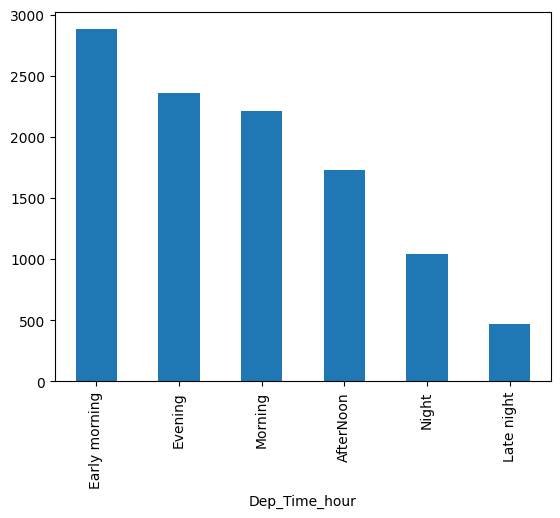

In [44]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar")

<Axes: xlabel='Dep_Time_hour'>

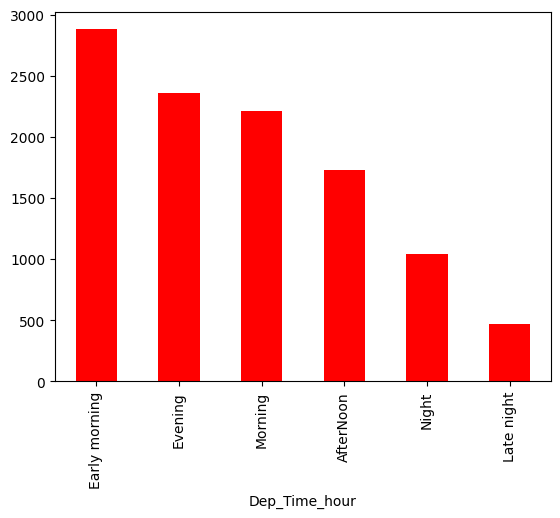

In [45]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="r")

In [46]:
#!pip install plotly
#!pip install chart_studio


^C
     ---------------------------------------- 0.0/64.4 kB ? eta -:--:--
     ---------------------------------------- 64.4/64.4 kB 1.7 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl.metadata (6.4 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl (99 kB)
   ---------------------------------------- 0.0/61.6 kB ? eta -:--:--
   ---------------------------------------- 61.6/61.6 kB 1.6 MB/s eta 0:00:00
Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)


In [ ]:
#!pip install cufflinks

In [47]:
## Lets use Plotly interactive plots directly with Pandas dataframes, but First u need below set-up !

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [52]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [53]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [54]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [55]:
data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [56]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [57]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [58]:
data['Duration'][0]

'2h 50m'

In [59]:
'2h 50m'.split(' ')

['2h', '50m']

In [60]:
'2h 50m'.split(' ')[0]

'2h'

In [61]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [62]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [63]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [64]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [65]:
data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [66]:
data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration, Length: 10682, dtype: int64

In [67]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [68]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [69]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25


In [70]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [71]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [72]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


<Axes: xlabel='Duration_total_mins', ylabel='Price'>

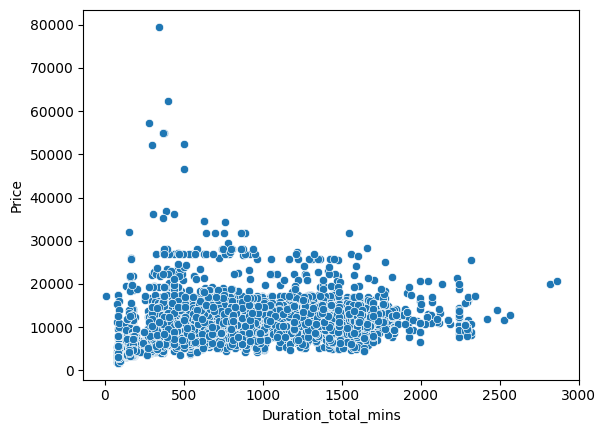

In [73]:
sns.scatterplot(x='Duration_total_mins',y='Price',data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

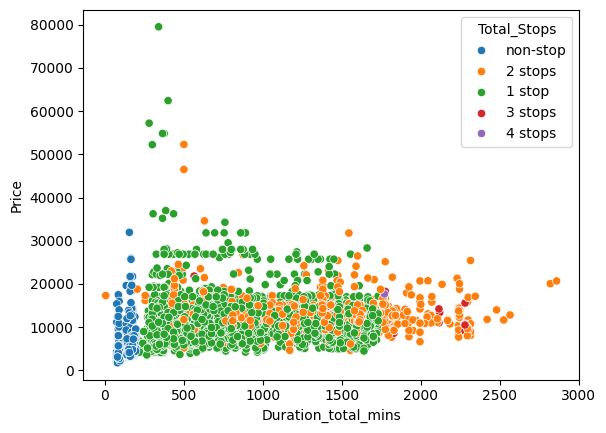

In [74]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue="Total_Stops",data=data)

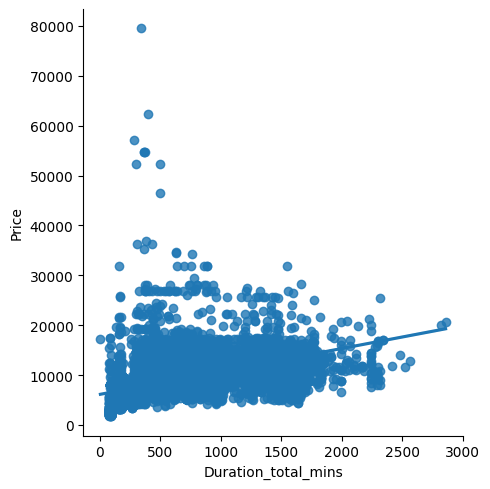

In [75]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [76]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [77]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [78]:
data[data['Airline']=='Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,21,20,24,45,1485


In [79]:
data[data['Airline']=='Jet Airways'].groupby('Route').count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [80]:
data[data['Airline']=='Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [81]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

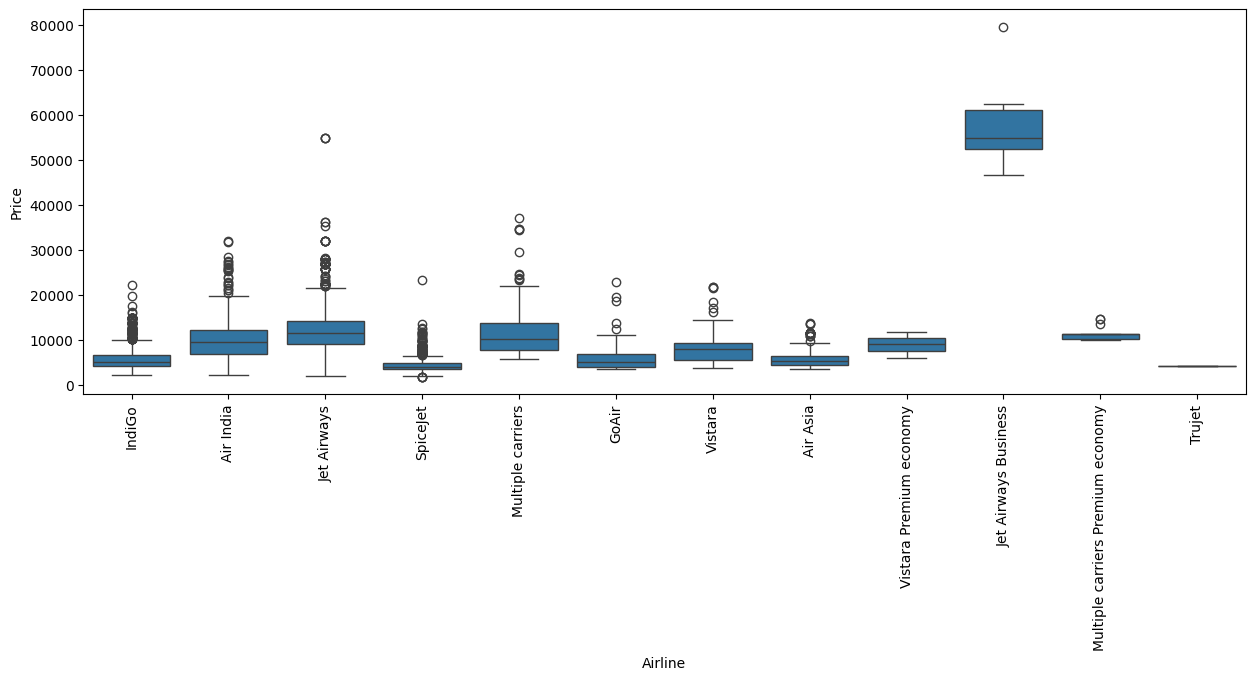

In [82]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [83]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140


In [84]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [85]:
[col for col in data.columns if data[col].dtype=="object"]

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [86]:
[col for col in data.columns if data[col].dtype!="object"]

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [87]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]

In [88]:
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [89]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [90]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [ ]:
### One-hot from scratch :

In [91]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [92]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [93]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [94]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [95]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [96]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [97]:
data['Airline'].nunique()

12

In [98]:
data.groupby(['Airline'])['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [99]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [100]:
data.groupby(['Airline'])['Price'].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [101]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [102]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [103]:
{key:index for index,key in enumerate(airlines,0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [104]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [105]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [106]:
data['Airline'].map(dict1)

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [107]:
data['Airline']=data['Airline'].map(dict1)

In [108]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [109]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [110]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [111]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [112]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [113]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [114]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [115]:
dict2={key:index for index,key in enumerate(dest,0)}

In [116]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [117]:
data['Destination']=data['Destination'].map(dict2)

In [118]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [119]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [120]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [121]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [122]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [123]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [124]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [125]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [126]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [127]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [128]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [129]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0


In [130]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [131]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year'],axis=1, inplace=True)

In [132]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [133]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [134]:
data.drop(columns=['Route'] ,axis=1, inplace=True)

In [135]:
data.head(4)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [136]:
data.drop(columns=['Duration'] ,axis=1, inplace=True)

In [137]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [139]:
def plot(df,col):
    fig, (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3,kde=False)
    

C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\1016616279.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\1016616279.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




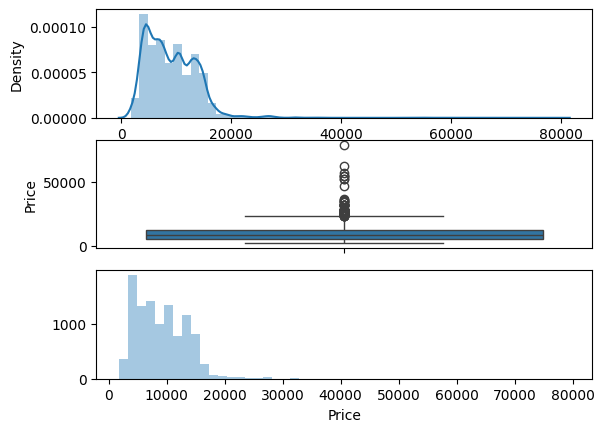

In [140]:
plot(data, 'Price')

In [141]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [142]:
print(maximum)

23017.0


In [143]:
print(minimum)

-5367.0


In [144]:
print([price for price in data['Price'] if price >maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [145]:
len([price for price in data['Price'] if price >maximum or price<minimum])

94

In [146]:
np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [147]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\1016616279.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\1016616279.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




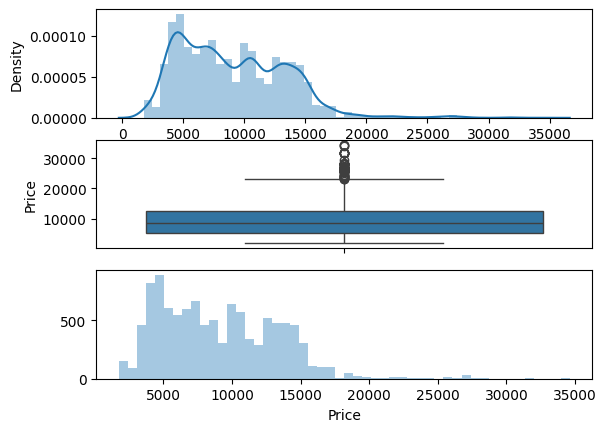

In [148]:
plot(data,'Price')

In [149]:
X=data.drop(['Price'],axis=1)

In [150]:
y=data['Price']

In [151]:
from sklearn.feature_selection import mutual_info_regression

In [152]:
imp=mutual_info_regression(X,y)

In [153]:
imp

array([1.3257783 , 1.06485949, 0.78702451, 0.37026425, 0.63136879,
       0.91966757, 0.74271802, 1.13974679, 0.89741005, 1.11913687,
       0.6773656 , 0.37612889, 0.44594593, 0.51774194, 0.13530925,
       0.20313613])

In [154]:
pd.DataFrame(imp)

,0
0,1.325778
1,1.064859
2,0.787025
3,0.370264
4,0.631369
5,0.919668
6,0.742718
7,1.139747
8,0.897410
9,1.119137


In [155]:
imp_df =pd.DataFrame(imp,index=X.columns)

In [156]:
imp_df.columns= ['importance']

In [157]:
imp_df

,importance
Airline,1.325778
Destination,1.064859
Total_Stops,0.787025
Journey_day,0.370264
Journey_month,0.631369
Dep_Time_hour,0.919668
Dep_Time_minute,0.742718
Arrival_Time_hour,1.139747
Arrival_Time_minute,0.897410
Duration_hours,1.119137


In [158]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.325778
Arrival_Time_hour,1.139747
Duration_hours,1.119137
Destination,1.064859
Dep_Time_hour,0.919668
Arrival_Time_minute,0.897410
Total_Stops,0.787025
Dep_Time_minute,0.742718
Duration_mins,0.677366
Journey_month,0.631369


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
ml_model=RandomForestRegressor()

In [163]:
model=ml_model.fit(X_train,y_train)

In [164]:
y_pred=model.predict(X_test)

In [165]:
y_pred

array([16825.86,  5318.43,  8804.86, ...,  3496.17,  6454.53,  6848.47])

In [166]:
from sklearn import metrics

In [167]:
metrics.r2_score(y_test , y_pred)

0.8119640193318308

In [ ]:
#!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [168]:
import pickle

In [ ]:
#file = open(r'/Users/arjunkc/Documents/data train .xlsx\rf_random.pkl', 'wb') 

In [170]:
pickle.dump(ml_model , open('rf_random.pkl','wb'))

In [171]:
model = open(r'rf_random.pkl', 'rb') 

In [172]:
forest = pickle.load(model)

In [173]:
y_pred2 = forest .predict(X_test)

In [174]:
metrics.r2_score(y_test , y_pred2)

0.8119640193318308

In [175]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [176]:
mape(y_test,forest.predict(X_test))

13.12982016545824

In [178]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9516293441798337
Predictions are : [16859.11  5431.58  8827.96 ...  3507.58  6447.08  6854.17]


r2_score: 0.8121007611968625
MSE :  3657947.1584585384
MAE :  1172.8088719367283
RMSE :  1912.5760529867925
MAPE :  13.155704659679564


C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\739007126.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




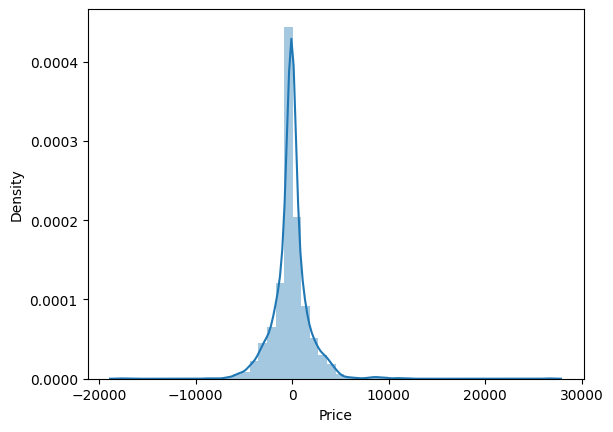

In [179]:
predict(RandomForestRegressor())

In [180]:
from sklearn.tree import DecisionTreeRegressor

Training_score: 0.966591628243878
Predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2_score: 0.6813794263214115
MSE :  6202777.773544448
MAE :  1410.5854236865096
RMSE :  2490.5376474858695
MAPE :  15.601216881902404


C:\Users\kamle\AppData\Local\Temp\ipykernel_7924\739007126.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




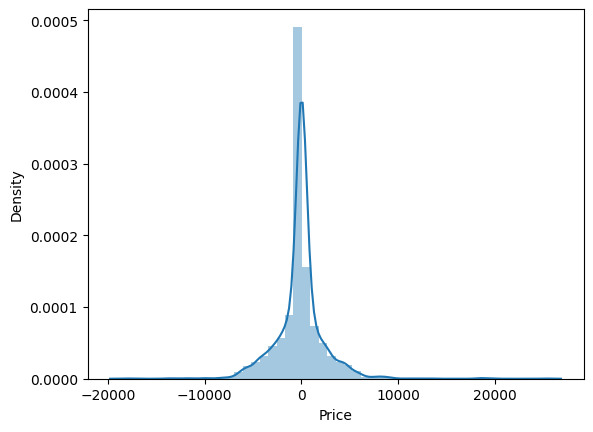

In [181]:
predict(DecisionTreeRegressor())

In [182]:
from sklearn.model_selection import RandomizedSearchCV

In [183]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [184]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [186]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [187]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [188]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [189]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [190]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


f:\KamleshMLProject\flightfareMLModel\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "f:\KamleshMLProject\flightfareMLModel\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\KamleshMLProject\flightfareMLModel\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "f:\KamleshMLProject\flightfareMLModel\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    valida

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [191]:
### to get your best model..
rf_Random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 15,
 'max_features': 'sqrt',
 'max_depth': 21}

In [192]:
pred2=rf_Random.predict(X_test)

In [193]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8159117377234444